<center>
    <h3>*ILI286 - Computación Científica II*</h3>
    <h4>Tarea 1</h4>
    <h1>Computación numérica en Python</h1>
</center>
<br>
<br>

<center>*Autor: Jorge Villagrán Munoz*</center>
<center>*Email:* <jorge.villagran@alumnos.usm.cl></center>
<center>*Rol: 201173530-7*</center>

# Introducción 

Hay muchos problemas matemáticos que conviene abordarlos mediante un computador, ya que permite agilizar el trabajo repetitivo y ahorrar tiempo al realizar operaciones complejtas. Python junto a sus librerias permite hacer construir, analizar y resolver distintos problemas matemáticos en diversas áreas. Además permite realizar gráficas, resolver problemas de manera analitica y aprovechar todo el potencial de las matrices implementadas como arreglos bidimencionales.

# Desarrollo y análisis de resultados 

Primero se importan las librerías de `Python` necesarias para desarrollar el total de funcionalidades que se requieren para esta tarea.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import scipy as sp
import pylab as pl
import math
import scipy.stats as stats

from ipywidgets import interact
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import axes3d, Axes3D
from sympy.abc import i, a, b, c, d

%matplotlib inline

## Pregunta 1: _Numpy y SciPy_

1.- Implemente el producto matriz vector y compare el resultado sobre matrices aleatoria con el producto matriz de numpy. Realice el experimento para $10.000$ de tamaño $100\times100$, presente los resultados en un histograma (numpy.histogram) de la norma del error entre su código y producto matriz vector de numpy.

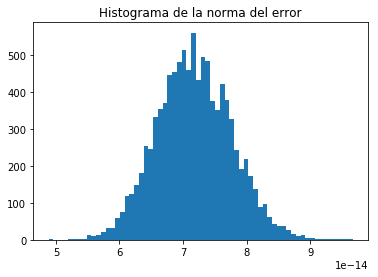

In [11]:
def cross(matriz, vector):
    resultado = np.zeros((matriz.shape[0], vector.shape[1]))
    num = 0
    for x in matriz:
        suma = 0
        for y in range(len(x)):
            suma = suma + x[y]*vector[y]
        resultado[num] = suma
        num = num + 1

    return resultado

errores = []
for i in range(10000):
    matriz = np.random.rand(100, 100)
    vector = np.random.rand(100, 1)
    my_resp = cross(matriz, vector)
    np_resp = np.dot(matriz, vector)
    errores.append(np.linalg.norm(my_resp - np_resp))

plt.hist(errores, bins='auto')
plt.title("Histograma de la norma del error")
plt.show()


Se implemento la función ´cross´ que calcula el producto vectorial entre una matriz y un vector. Luego se hicieron 10.000 productos vectoriales, donde se utilizo la funcion ´cross´ y la función de ´numpy´. Por cada resultado se calculo el error dado por la resta del resultado obtenido por ambos métodos y se calculo la norma. Luego se realizo un histograma de las normas para de las 10.000 iteraciones. Como se puede apreciar el histograma tiene la forma de una campana gauseana, lo que indica el grueso de los errores encontrados se encuentra cercano $7 \cdot 10^{-14}$ con un frecuencia mayor a 500 veces. A medida que nos vamos alejando de ese valor la frecuencia de cada error va disminuyendo, y ya alejados del intervalo $[6 \cdot 10^{-14}, 8 \cdot 10^{-14}]$ la frecuencia disminuye a menos de 100.

Si bien el error es muy pequeño entre ambos métodos, no deja de ser considerable considerable cuando se requiere mucha presición. Dadas las diferencias es de esperar que el método utilizado por `numpy` este optimizado y utilice otros metodos de operación entre elementos para asegurar la presición.

2.- Construya una matriz diagonal dominante con operaciones vectoriales. ¿Cómo demuestra que es diagonal dominante?

In [22]:
#Matriz Diagonal Dominante
from scipy import linalg

def es_dominante(matriz):
    dominante = True
    for i in range(len(matriz)):
        suma = 0
        for j in range(len(matriz)):
            if (i != j):
                suma = suma + abs(matriz[i][j])
        if(matriz[i][i] < suma):
            dominante = False
    return dominante

def obtener_dominante():
    while True:
        matriz = np.floor(np.random.rand(3, 3)*10)
        try:
            inversa = np.floor(linalg.inv(matriz)*10)
        except:
            continue

        dominante = np.dot(matriz, inversa)
        if es_dominante(dominante):
            break
    return dominante


matriz = obtener_dominante()
print(matriz, "\n")

if(es_dominante(matriz)):
    print("La matriz resultante es dominante")
else:
    print("La matriz resultante no es dominante")

[[ 6. -3. -3.]
 [-4.  6. -2.]
 [-4. -4.  8.]] 

La matriz resultante es dominante


Se implementaron dos funciones: la primera llamada `obtener_dominante`que obtiene una matriz aleatoria utilizando la función `random` de `numpy`, para luego calcular su inversa y multplicarla con ella misma para obtener una matriz identidad aproximada.
Como por definición la matriz identidad es diagonal dominante, acá se utilizaron operaciones vectoriales para obtenerla manualmente. La matriz resultante se aproxima a una matriz identidad pero no lo es, ya que en cada operación de saca la función techo de todo los valores de la matriz multiplicados por 10, con el objetivo obtener números más amigables para su futura presentación. La segunda funciónn se llama `es_dominante` y como su nombre lo dice verifica si la matriz entregada es dominante o no. Para esto se utiliza la misma definición de matriz dominante, verificando que el valor de la diagonal por cada fila sea mayor a la suma de los otros elementos de la misma fila.

3.-Multiplique 2 matrices diagonal dominante, ¿Es la matriz resultante diagonal dominante?

In [31]:
dom_true = 0
dom_false = 0

for i in range(1000):
    m1 = obtener_dominante()
    m2 = obtener_dominante()
    mr = np.dot(m1, m2)
    
    if(es_dominante(mr)):
        dom_true = dom_true + 1
    else:
        dom_false = dom_false + 1
        
print("Nº casos dominante: ", dom_true)
print("Nº casos  no dominante: ", dom_false)

Nº casos dominante:  590
Nº casos  no dominante:  410


4.- Resuelva los siguientes sistemas de ecuaciones lineales para los $x_i$'s:
    <div style="margin-left: 40px;">
    <br> a) $x_1+1=x_2$, $x_1+x_2=10$ 
    <br> b) $\displaystyle{\sum_{i=1}^{20} x_{i}}=1$, $\displaystyle{\sum_{i=1}^{20} a_{j,i}\,x_{i}}=1$, para $j=2 \dots 20$ y $a_{j,i}=(i+j)\exp{-(i-j)}$
    </div>

In [32]:
#Resolución de Sistemas de Ecuación

#Sistema 1
A = np.array([[1., -1.],[1., 1.]])
B = np.array([-1., 10.])
R = np.linalg.solve(A, B)
print(R)

#Sistema 2
matriz = np.zeros((20, 20))
vector = np.ones(20)
matriz[0] = vector

for j in range(2, 21):  
    for i in range(1, 21):
        matriz[j-1][i-1] = (i + j)**(j - i)

solucion = np.linalg.solve(matriz, matriz[0])
print(solucion)

[ 4.5  5.5]
[  8.46611038e+00  -7.23184085e+02   9.39583428e+03   2.47439397e+06
  -2.53815961e+08   1.49055794e+10  -6.43259402e+11   2.19161061e+13
  -6.03950719e+14   1.34823620e+16  -2.40092124e+17   3.29463208e+18
  -3.26048950e+19   2.02181438e+20  -4.96437903e+20  -1.15032403e+21
  -1.03956197e+20   8.78084691e+20  -6.79074660e+20   1.37906411e+21]


Para el calculo del primer sistema de ecuación, éste fue llevado a su forma matricial y luego se utilizo la función `solve` de la libreria `linalg` de `numpy` para resulver dicho sistema. Luego el resultado fue impreso obteniendo el valor de $x_1 = 4.5$ y de $x_2 = 5.5$. Para el segundo sistema, se construyo la primera ecuación utilizando la función `ones`de `numpy` para obtener un vector conformado de puros unos. Para la segunda ecuacuón se utilizo un doble ciclo `for` para ir llevando las otras 19 ecuaciones a su forma matricial. Una vez construidas las matrices se utilizo la función `solve` para encontrar la solución del sistema, obteniendo valores para cada uno de las 20 variables que la conformaban.

5.- Construya un código basado en scipy.optimize que encuentré el mínimo de $F(a_0,a_1)=\sum_{i=1}^{1000}(\exp(x_i)-a_0-a_1\,x_i)$, donde $x_i=-1+\frac{2}{999}(i-1)$

In [47]:
def functionF(x):
    return sum(np.exp(-1 + (2/999)*(i - 1)) - x[0] - x[1]*(-1 + (2/999)*(i - 1)) for i in range (1, 1001))

inicial = np.array([
    [-1.0, -1.0], 
    [-0.5, -0.5], 
    [ 0.0,  0.0], 
    [ 0.0,  0.5], 
    [ 1.0,  1.0]
])
solucion = minimize(functionF, inicial, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
print(solucion)

 final_simplex: (array([[  8.60485754e+43,   1.02591608e+43,  -7.10496165e+42,
         -1.16914393e+42,   1.98529249e+40,   1.69815830e+41,
          6.41345229e+40,   1.55461356e+42,   7.04638400e+42,
         -2.22278445e+42],
       [  6.89531986e+43,   8.22096063e+42,  -5.69341014e+42,
         -9.36868661e+41,   1.59087198e+40,   1.36078309e+41,
          5.13928380e+40,   1.24575657e+42,   5.64647018e+42,
         -1.78118112e+42],
       [  6.63311648e+43,   7.90834806e+42,  -5.47691092e+42,
         -9.01243029e+41,   1.53037703e+40,   1.30903757e+41,
          4.94385595e+40,   1.19838507e+42,   5.43175591e+42,
         -1.71344942e+42],
       [  6.11559800e+43,   7.29133548e+42,  -5.04960007e+42,
         -8.30927675e+41,   1.41097638e+40,   1.20690592e+41,
          4.55813426e+40,   1.10488658e+42,   5.00796807e+42,
         -1.57976539e+42],
       [  5.83539945e+43,   6.95726813e+42,  -4.81824238e+42,
         -7.92857035e+41,   1.34632963e+40,   1.15160907e+41,
       

A continuación, definimos la función `functionF` retorna la función con sumatoria `F` solicitada. Se eligio el método `Nelder-Mead` para minimizar la función `F`. Al aplicar el algoritmo es posible observar que los valores de éste disminuyen a valores muy pequeños, de orden de los $-10^{42}$. Dada las limitaciones del lenguaje no se puede llegar más allá pero si se pudiera se podría obserbar que este numero decredecia infinitamente, por lo que se puede concluir que le función efectivamente no tiene un mínimo global.

## Pregunta 2: _SymPy_ 

1.- Obtenga el $\displaystyle{\lim_{x\rightarrow 0}\frac{\sin(x)}{x}}$ con sympy.

In [71]:
x = sym.symbols('x')
sym.limit(sym.sin(x)/x, x, 0)

1

Se creo una variable simbolica `x` para luego utilizar la función `limit` de `sympy` que permita calcular el limite conocido de $\frac{\sin(x)}{x}$ cuando x tiende a cero, cuyo valor es $1$.

2.- Obtenga la derivada de $f(x)=\sin\left(\sum_{i=1}^{20}x^i\right)\cos\left(\prod_{i=1}^{20}\log(x+i)\right)$

In [3]:
x = sym.symbols('x')
sym.diff(sym.sin(sym.Sum(x**i, (i, 1, 20)).doit())*sym.cos(sym.Product(sym.log(x + i), (i, 1, 20)).doit()), x)

(20*x**19 + 19*x**18 + 18*x**17 + 17*x**16 + 16*x**15 + 15*x**14 + 14*x**13 + 13*x**12 + 12*x**11 + 11*x**10 + 10*x**9 + 9*x**8 + 8*x**7 + 7*x**6 + 6*x**5 + 5*x**4 + 4*x**3 + 3*x**2 + 2*x + 1)*cos(log(x + 1)*log(x + 2)*log(x + 3)*log(x + 4)*log(x + 5)*log(x + 6)*log(x + 7)*log(x + 8)*log(x + 9)*log(x + 10)*log(x + 11)*log(x + 12)*log(x + 13)*log(x + 14)*log(x + 15)*log(x + 16)*log(x + 17)*log(x + 18)*log(x + 19)*log(x + 20))*cos(x**20 + x**19 + x**18 + x**17 + x**16 + x**15 + x**14 + x**13 + x**12 + x**11 + x**10 + x**9 + x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x) - (log(x + 1)*log(x + 2)*log(x + 3)*log(x + 4)*log(x + 5)*log(x + 6)*log(x + 7)*log(x + 8)*log(x + 9)*log(x + 10)*log(x + 11)*log(x + 12)*log(x + 13)*log(x + 14)*log(x + 15)*log(x + 16)*log(x + 17)*log(x + 18)*log(x + 19)/(x + 20) + log(x + 1)*log(x + 2)*log(x + 3)*log(x + 4)*log(x + 5)*log(x + 6)*log(x + 7)*log(x + 8)*log(x + 9)*log(x + 10)*log(x + 11)*log(x + 12)*log(x + 13)*log(x + 14)*log(x + 15)*log(x + 16)*log(

Se utilizaron las variables simbolicas de `sympy` para calcular la derivada de la función mediante el comando `diff`. Además se utilizaron los comandos `Sum`, `sin`, `cos`, `Product`, y `log` para poder hacer la sumatoria, seno, coseno, productoria y función logaritmo respectivamente, soportando las variables simbolicas de `sympy`. Se puede apreciar que el resultado arroja una expresión bastante extensa. Esto principalmente debido a que la productoria ubicada como argumento del coseno.

3.- Obtenga la parte real e imaginaria de la siguiente función compleja: $f(z)=z^2+1$, donde $z=x+\mathit{i}\,y$ y $\mathit{i}=\sqrt{-1}$

In [4]:
i = sym.sqrt(-1)
expresion = (x + i)**2 + 1
expresion.as_real_imag()

(-(im(x) + 1)**2 + re(x)**2 + 1, 2*(im(x) + 1)*re(x))

Con `sympy` se pudo determinar la parte real y la parte imaginaria de la función $f(z)=(x + \sqrt{-1})^2+1$. En este caso la parte imaginaria esta denotada por $im$ y la parte reap por $re$. Esto se logro utilizando el comando `as_real_imag` de `sympy`.

4.- Obtenga la inversa de $A=\begin{pmatrix}
a & b\\
c & a
\end{pmatrix}$, donde $a,b,c \in \mathbb{R}$

In [11]:
matriz = sym.Matrix(([a, b], [c, a]))
matriz.inv()

Matrix([
[1/a + b*c/(a**2*(a - b*c/a)), -b/(a*(a - b*c/a))],
[          -c/(a*(a - b*c/a)),      1/(a - b*c/a)]])

Esta es una aplicación muy potente de `sympy` ya que permite realizar calculos con expresionas matemáticas, sin necesidad de tener que asignar valores numéricos. Para esto primero se declaro una matriz de $2x2$ y luego se aplico la función `inv` que permite calcular la inversa.

5.- Obtenga los valores y vectores propios de $A=\begin{pmatrix}
a & b\\
c & a
\end{pmatrix}$, donde $a,b,c \in \mathbb{R}$

In [8]:
matriz = sym.Matrix(([a, b], [c, a]))
matriz.eigenvals()
matriz.eigenvects()

[(a - sqrt(b*c), 1, [Matrix([
   [-b/sqrt(b*c)],
   [           1]])]), (a + sqrt(b*c), 1, [Matrix([
   [b/sqrt(b*c)],
   [          1]])])]

Utilizando la función `eigenvects` de `sympy`, es posible obtener directamente los valores y vectores propios de una matriz. Si solo se quisieran los valores propios se puede utilizar la función `eigenvals`.

## Pregunta 3:  _Matplotlib_

1.- Construya un plot de las siguientes funciones $\sin(x)$, $\cos(x)$, $\exp(\sin(x))$, y $\exp(-\tan^2(x))$ para $x=[0,2\,\pi]$. Todos debes incluirse en el mismo gráfico con diferentes colores y líneas sólidas. Debe incluir la leyenda respectiva, además de las etiquetas de los ejes y el título.

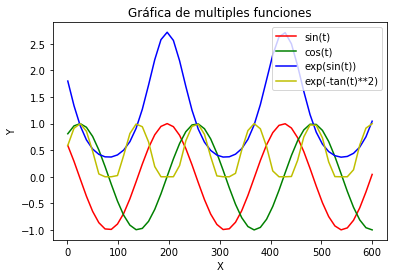

In [9]:
fig = plt.figure()
t = np.linspace(0.2 * math.pi, 600)

f1 = np.sin(t)
f2 = np.cos(t)
f3 = np.exp(np.sin(t))
f4 = np.exp(-np.tan(t)**2)

plt.plot(t, f1, 'r', label = 'sin(t)')  
plt.plot(t, f2, 'g', label = 'cos(t)') 
plt.plot(t, f3, 'b', label = 'exp(sin(t))') 
plt.plot(t, f4, 'y', label = 'exp(-tan(t)**2)')

plt.title('Gráfica de multiples funciones')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()

Gracias a la libreria `Matplotlib` es posible graficar varias funciones en una misma figura. Para distingirlas a la traza de cada una se le pinto de un color diferente. Esta herramienta es muy util por que sirve para ver que función es mayor que otra en algun intervalo, determinar los mínimos y máximos locales, ver pendientes, curvaturas e intersecciones.

2.- Genere $10^6$ números aleatorios de la distribución normal estandar, obtenga un histograma con 50 bins. Grafique el histograma y la distribución normal estandar. ¿Se parecen?

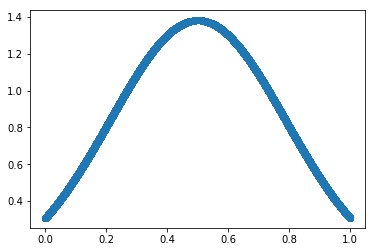

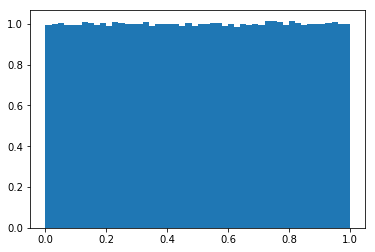

In [10]:
data = sorted(np.random.rand(1, 1000000)[0])
norm = stats.norm.pdf(data, np.mean(data), np.std(data))  

pl.plot(data, norm,'-o')
pl.show()

pl.hist(data, normed=True, bins = 50)
pl.show()

Primero se generaron 1.000.000 números aleatorios en el intervalo $[0, 1]$ es que es donde la distribución normal estandar obtiene sus valores. Luego se graficaron dichos valores, obteniendo la primera figura. Como se puede apdecir esta tiene la tipica forma de campana gauseana que se muestra a menudo en este tipo de distribuciones. Luego se realizo un histograma de los datos donde se puede apreciar que la frecuencia de los datos esta distribuida equitativamente en todo el interfalo. Por lo que es posible afirmar que la generación de números mediante la función Random si es aleatoria y no tiene ningun cesgo.

3.- Construya la siguiente curva parametrica en 3D: $\vec{r}(t)=\langle \cos(t), \sin(t), t \rangle$.

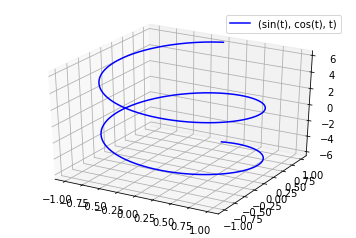

In [5]:
fig = plt.figure().gca(projection='3d')
t = np.linspace(-2 * math.pi, 2 * math.pi, 600)

x = np.sin(t)
y = np.cos(t)
fig.plot(x, y, t, 'b', label='(sin(t), cos(t), t)')
fig.legend()

plt.show()

Se grafico la curva parametrica $\vec{r}(t)=\langle \cos(t), \sin(t), t \rangle$ cuya forma es la de una espiral creciente en el eje `Z` positivo. Para realizar esto se utilizaron las funciones de `Matplotlib` que permiten graficar curvas y solidos en 3 dimensiones. Si no estuviera el parametro $t$ en en la coordenada del $Z$ positivo la curva describiria una circunferencia. El parametro $t$ en dicho eje provoca la elevación a la traza a medida que este aumenta, dando como resultado la espieral de la figura.

4.- Construya un plot en 2D de las ecuaciones de la pregunta 4 de la sección Numpy y Scipy. ¿Puede encontrar la solución observando la gráfica? ¿Se puede hacer lo mismo con 4.B?

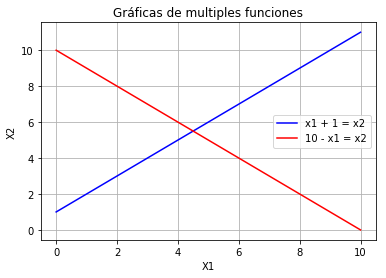

In [52]:
#Sistema 1 sección Numpy y Scipy

t = np.linspace(0, 10, 400)

f1 = t + 1
f2 = 10 - t

plt.plot(t, f1, 'b', label = 'x1 + 1 = x2')  
plt.plot(t, f2, 'r', label = '10 - x1 = x2') 

plt.title('Gráficas de multiples funciones')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.legend()

plt.show()

En la pregunta 4 de la sección Numpy y Scipy se resolvio un sistema de ecuaciones de 2 variables. Como ya se sabe esto se puede llevar de manera gráfica a su presentación en el eje cartesiano, representando la intersección de dos rectas. Aquí se graficaron ambas rectas y como se puede verificar ambas se intersectan en $x = 4.5$ e $y = 5.5$. Para el segundo sistema de ecuaciones se tienen 20 ecuaciones y 20 incognitas por lo que el sistema puede tener solución unica si todas las ecuaciones son linealmente independientes. Pero no se pueden llevar las 20 dimensiones a un gráfica. Intuitivamente deberia representar la interseccion de varios vectores 20-dimensionales en dicho espacio.

5.- Construya un plot en 3D de la función $F(a_0,a_1)$ de la pregunta 5 de la sección Numpy y Scipy. ¿Puede encontrar el mínimo observando la gráfica?

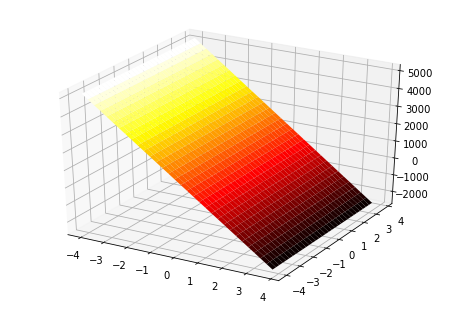

In [48]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, functionF([X,Y]), rstride=1, cstride=1, cmap='hot')

En la pregunta donde se presento este problema se llego a la conclusión de que la función no tenia un mínimo global. Ahora se intentara llevar a la misma conclusión pero de manera gráfica. Gracias ala función `Axes3D` de la libreria `Matplotlib` fue posible construir su gráfica en 3 dimensiones. Como se puede apreciar, su forma se asemeja a la de una bandeja infinita inclinada en un angulo aproximado a los 45 grados, la cual decrece infinitamente. Por lo que llegamos a la misma conclusión que anteriormente. La función no tiene mínimo global. 

## Pregunta 4: _Hands-On_ 

1.- Busque numéricamente la raíz de $\sin(x)$ que está entre $3$ y $3.2$. Ya sabemos que corresponde a $\pi$, pero aquí se quiere encontrar una forma de determinar $\pi$.

In [27]:
#Determinar el valor de Pi buscando la raiz de sen(x) entre 3 y 3.2

def biseccion(f, a, b):
    mid = (a + b)/2
    if abs(f(mid)) < 0.000001:
        return mid
    elif f(a)*f(mid) < 0:
        return biseccion(f, a, mid)
    else:
        return biseccion(f, mid, b)

y = lambda x: sp.sin(x)
raiz = biseccion(y, 3, 3.2)
print(raiz)

3.141592407226563


Para realizar esto se utilizo el método de la bisección. Lo que se hace es que a petir de un intervalo evalua su punto medio en la función y se verifica si es raiz o no. Si no lo fuera se reduce el intervalo dependiendo del signo de la evaluación. Esto se realiza iterativamente hasta que el valor de la evaluación sea la raíz o sea menor que un error definido, el cual se escoge dependiendo de número de cifras significativas con el cual se quiera obtener la raíz. En este caso se utilizo un error de $0.000001$ y se logro obtener con el método de la bisección el valor para $\pi$ de $3.141592407226563$. Hay que destacar que como se utilizo una presición de 6 decimales, el valor de $\pi$ que se tiene con certeza es $3.141592$, el resto de los decimales tienen una incertidumbre y son solo aproximaciones del método.

2.- Grafique $\displaystyle{\frac{\sin(x)}{x}}$ en el intervalo $[-1,1]$.

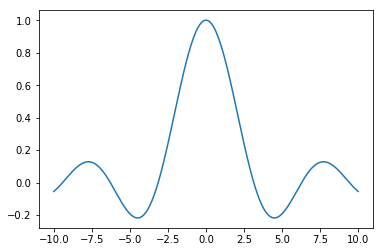

In [7]:
#Imprimir la funcion Sen(x) en el interfalo [-1, 1]
X = np.linspace(-10, 10, 256, endpoint=True)
f = np.sin(X)/X
plt.plot(X, f)
plt.show()

En la figura se muestra la gráfica de la función $\displaystyle{\frac{\sin(x)}{x}}$ que como se pude apreciar, es concava con su máximo en el punto $[0, 1]$. Esto concuerda con el liminite cuando $x$ tiende a cero que se calculo anteriormente y cuyo valor fue $1$. El seno es una función periodica, pero el x dividiendola hace que los picos y crestas disminuyan a medida que se alejen del eje de las ordenadas. Eventualmente al infinito las curvas llegaban a $y = 0$.

3.- Considere los siguientes puntos: $(0.1,0.7, 4.2)$, $(0.5,0.5, 3.3)$, $(0.9,0.7, 4.2)$ y $(0.18,0.3, 2.5)$. Grafique lo puntos utilizando la función scatter de matplotlib. ¿Cuál es la mejor función lineal que aproxima esos puntos?

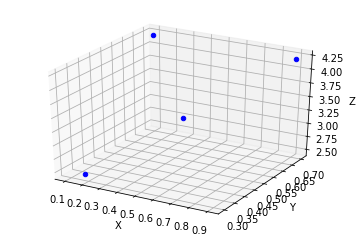

In [53]:
#Graficar conjunto de puntos

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

data = np.array([
    [0.1, 0.7, 4.2], 
    [0.5, 0.5, 3.3], 
    [0.9, 0.7, 4.2], 
    [0.18, 0.3, 2.5]
])
for i in data:
    ax.scatter(i[0], i[1], i[2], c = 'b', marker = 'o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Se utlizo la función `add_subplot` y `scatter` de la libreria `Matplotlib` para graficar un conjunto de putos en el espacio de 3 dimensiones. Como se puede observar estos puntos estan dispersos y claramente no pueden ser interpolados por una misma recta o un mismo plano. Por lo que solo es posible encontrar una aproximación de un plano que represente de la mejor manera posible al conjunto de puntos.

4.- Construya los siguientes campos vectoriales en 2D: $\langle x,y\rangle$,$\langle -y,x\rangle$ y $\langle x-y,x+y\rangle$.

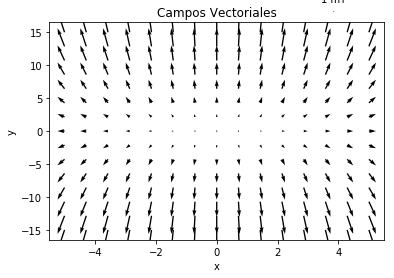

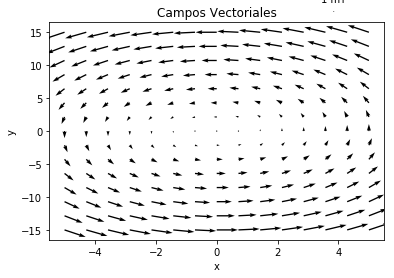

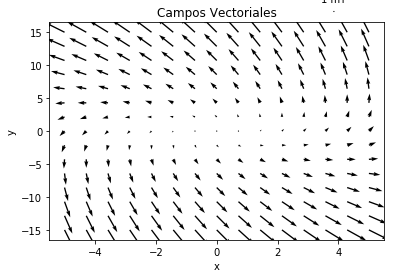

In [9]:
#Se crea la red y se calculan los componentes del vector
x = pl.linspace(-5.0, 5.0, 15)
y = pl.linspace(-15, 15, 15)
X, Y = pl.meshgrid(x, y)

campos = ([X, Y], [-Y, X], [X - Y, X + Y])
for campo in campos:
    pl.figure()
    pl.title('Campos Vectoriales')
    pl.xlabel('x')
    pl.ylabel('y')

    QP = pl.quiver(X, Y, campo[0], campo[1])
    pl.quiverkey(QP, 0.85, 1.05, 1.0, '1 mT', labelpos='N')

    pl.show()

La mejor forma de representar campos vectoriales es mediante fechas en un espacio de 2 o 3 dimensiones tal como se muestra en las 3 figuras graficadas mediante las funcioens `quiver` y `quiverkey`. Como se puede apreciar, el primer campo vectorial, $\langle x,y\rangle$, representa la recta una recta unitaria que pasa por el origen, por lo que como se observa en su figura se aprecian fechas saliendo del origen del eje cartesiano. Cuanto mas lejos esten del origen mayor es la magnitud de cada vector, es por esto que cada flecha se hace más grande. El segundo campo vectorial, $\langle -y,x\rangle$, se invierten los ejes y la primera componente es negativa, dando como resultado que el conjuto de vectores den vuelta en forno al origen, y cuando más alejados esten mayor es su magnitud. Si pudiera dibujar se de forma continua representaría anillos concentricos al origen. Para el último campo vectorial, $\langle x-y,x+y\rangle$, que es la suma de los dos campos anteriores se puede observar como tambien se suman las características, dando como resultado un campo vectorial donde los vectores van saliendo del origen pero en forma de espiral creciente. A medida que se alejan del origen aumenta su magnitud y además giran en torno al origen. Este comportamiento se da mucho en otros campos como física y química donde se cumple el principio de superposición de campos vectoriales, por ejemplo (superposición de campos eléctricos), donde en este caso la suma de los campos vectoriales se calcula como la suma de vectores componente a componente.

5.- Elija algún método de interpolación y aplíquelo para $f(x) = e^{-x^2}$ en el intervalo $[-2,2]$ utilizando $n=32$ puntos equiespaciados, luego grafique con una cantidad de puntos adecuada (¡mayor a 32!). ¿Es el resultado esperado de acuerdo al método elegido?.

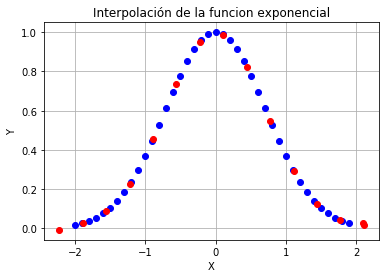

In [54]:
def interpolar(px, py, punto):
    total = 0
    
    for i in range(len(px)):
        parcial = py[i]
        for j in range(len(py)):
            if i == j:
                continue
            else:
                parcial = parcial*(punto - px[j])/(px[i] - px[j])
        total = total + parcial
    return total

F = lambda x: np.exp(-x**2)
PX = []
PY = []

for i in range(-20, 20):
    val = i/10
    PX.append(val)
    PY.append(F(val))


newX = [2.1]
newY = [interpolar(PX, PY, newX[0])]
for i in range(-20, 20, 3):
    val = i/9
    newX.append(val)
    newY.append(interpolar(PX, PY, val))

plt.figure()
plt.plot(PX, PY, 'bo')
plt.plot(newX, newY, 'ro') 

plt.title('Interpolación de la funcion exponencial')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.show()

Para realizar la interpolación se utilizo el método de Lagrange que consiste en construir un polinomio de grado n, que se anule en los puntos salvo en uno de ellos, donde se obtendra el valor de 1. Todo el procedimiento que requiere el método se llevo a cabo con la función `interpolar` que recibe como parámetros un arreglo con los $x$, un arreglo con las $y$ y el punto en el cual se quiere interpolar. La función retorna el punto evaluado en el polinomio interpolador.

Para comprobar si el resultado es el esperado, se tomaron varios puntos distintos a los que se utilizaron para construir el polinimio interpolador y se evaluaron en este. Luego se realizo la gráfica que se muestra más arriba, donde los puntos azules son los que fueron utilizados para construir el polinimio interpolador mientras que los puntos rojos son los nuevos puntos.

Se puede apreciar que los nuevos puntos obtenidos (los de color rojo) a partir de la interpolación se superponen a la gráfica de los puntos obtenidos directamente la evaluar la función. Por lo que los resultados son los esperados el polinomio interpolador se asemeja a la función $f(x) = e^{-x^2}$ en el intervalo $[-2,2]$.

6.- Considere un sistema de tres ecuaciones diferenciales de primer orden expresado en forma matricial:
$\dfrac{d\mathbf{x}(t)}{dt} = A\,\mathbf{x}(t) \iff 
\begin{bmatrix}\frac{dx_1(t)}{dt} \\ \frac{dx_2(t)}{dt} \\ \frac{dx_3(t)}{dt} \end{bmatrix}
=
\begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} 
\end{bmatrix}\,
\begin{bmatrix}
x_{1}(t) \\ x_{2}(t) \\ x_{3}(t)
\end{bmatrix}
\qquad
\text{donde}
\qquad
\mathbf{x}(0) = \mathbf{x}_0 = 
\begin{bmatrix}
x_{01} \\ x_{02} \\ x_{03}
\end{bmatrix}$.
Si los valores propios de la matriz $A$ son reales y distintos, la solución del sistema anterior viene dada por:
$
\mathbf{x}(t) = \beta_1\,\mathbf{v}_1\,e^{\lambda_1\,t} + \beta_2\,\mathbf{v}_2\,e^{\lambda_2\,t} + \beta_3\,\mathbf{v}_3\,e^{\lambda_3\,t}
$
donde $\mathbf{v}_i$ es el vector propio asociado a $\lambda_i$ y $\beta_i$ es una constante que depende de $x_0$ de la siguiente forma:
$
V\,\vec{\beta} = \mathbf{x}_0
$
donde $V$ es una matriz cuyas columnas son los vectores propios de $A$ y $\vec{\beta}$ un vector columna con las constantes.
Programe una función, que permita resolver un sistemas de 3 ecuaciones diferenciales de primer orden. Esta función debe:
    1. Recibir como input una matriz $A$, un vector columna $\mathbf{x}_0$ y un tiempo $t_f$.
    2. Calcular los valores y vectores propios de $A$.
    3. Determinar el vector de constantes $\beta$.
    4. Graficar la solución $x(t)$ para el intervalo de tiempo $[0,t_f]$.    
Por ejemplo, considere $A = \begin{bmatrix}2.2 & 1.8 & 2.4 \\ 2.3 & 0.3 & 1.3 \\ 0.9 & 0.2 & 0.6\end{bmatrix}$, con vector inicial $x_0 = \begin{bmatrix}1.29\\0.39\\0.54\end{bmatrix}$ y para $t = [0,1]$, ¿Cuáles son las soluciones?

In [77]:
#Función de resolución de sistemas de ecuaciones diferenciales de primer orden

def solve_system(A, x0, t):
    valores = A.eigenvals()
    vectores = A.eigenvects()
    
    V = A
    
    for i in range(3):
        for j in range(3):
            V[i, j] = vectores[i][2][0][j]

    B = V.LUsolve(x0)
    t = sym.symbols('x')
    #F = B[0]*V[0]*np.exp(valores[0]*t) + B[1]*V[1]*np.exp(valores[1]*t) + B[2]*V[2]*np.exp(valores[2]*t)
        

#Declaración de Matrices y Vectores
A = sym.Matrix([[2.2, 1.8, 2.4], 
               [2.3, 0.3, 1.3], 
               [0.9, 0.2, 0.6]])

x1 = sym.Matrix([[1.29, 0.39, 0.54]])
x0 = sym.Matrix([[1.29], [0.39], [0.54]])

solve_system(A, x0, [0, 1])


# Conclusiones

Muchas de las conclusiones relevantes se realizaron en las respectivas preguntas, pero aún se pueden realizar conclusiones generales respecto al informe.

A pesar de las limitaciones en cuento a la sintaxis respecot a herramientas parecidas como Mathematica, python con sus librerias son una muy buena herramienta para utilizarlo en computación cientifica. Además junto con el entorno que provee Jupyter es posible realizar casi el total de funciones que permite este poderoso lenguaje gracias a que tiene incluidas todas las librerias necesarias.

Esto permitio abordar una gran cantidad de problemas, desde el desarrollo de limintes hasta la resolución de ecuaciones diferenciales.


# Referencias

* Timothy Sauer. (2013). En Análisis Numérico Segunda Edición.(531 - 537). México: Pearson. 
* Claudio Torres, Alvaro Salinas, Martín Villanueva. (Abril 2016). ILI286 - Computación Científica II. S]cientific [C]omputing [T]eam, DI UTFSM. 20 agosto 2016.(*Notebook* del curso) 
* 20 agosto 2016, Sitio web: http://docs.sympy.org/0.6.7/modules/polynomials.html
* 20 agosto 2016, Sitio web: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html
* 21 agosto 2016, de http://matplotlib.org Sitio web: http://matplotlib.org/users/pyplot_tutorial.html